In [224]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [226]:
df = pd.read_csv('data.csv')

28

In [ ]:
# south_america = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
# "French Guiana", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]

In [ ]:
# north_america = ["Anguilla", "Antigua & Barbuda", "Aruba", "Bahamas", "Barbados", "Belize", "Bermuda", "Bonaire", 
#                  "British Virgin Islands", "Canada", "Cayman Islands", "Costa Rica", "Cuba", "Curacao", "Dominica",
#                  "Dominican Republic", "El Salvador", "Grenada", "Guadeloupe", "Guatemala", "Haiti", "Honduras",
#                  "Jamaica", "Martinique", "Mexico", "Montserrat", "Netherlands Antilles", "Nicaragua", "Panama",
#                  "Puerto Rico", "Saba", "Saint Kitts and Nevis", "St Lucia", "St Barthelemy", "St Eustatius", 
#                  "St Kitts Nevis", "St Vince Grenadines", "St. Martin", "Trinidad & Tobago", "Turks and Caicos Islands", 
#                  "United States", "US Virgin Islands"]


In [ ]:
# europe = ["Aland Islands", "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia Herzegovina",
#           "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "England", "Faroe Islands", "Finland", "France",
#           "Germany", "Gibraltar", "Greece", "Greenland", "Guernsey", "Hungary", "Iceland", "Ireland", "Isle of Man", "Kosovo",
#           "Italy", "Jersey", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "FYR Macedonia", "Malta", "Moldova",
#           "Monaco", "Montenegro", "Netherlands", "Northern Ireland", "Norway", "Poland", "Portugal", "Republic of Ireland", "Romania", "Russia", "San Marino", "Scotland",
#           "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom",
#           "Vatican City State", "Wales"]

In [ ]:
# oceania = ["Australia", "Federated States of Micronesia", "Fiji", "Guam", "Kiribati", "Marshall Islands", "Nauru", "New Caledonia",
#            "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]

In [ ]:
# africa = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", 
#           "Central African Rep.", "Chad", "Comoros", "Congo", "DR Congo",
#           "Ivory Coast", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Ethiopia", "Gabon", "Gambia", 
#           "Ghana", "Guinea", "Guinea Bissau", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
#           "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
#           "São Tomé & Príncipe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
#           "Sudan", "Swaziland", "Tanzania", "Togo", "Tunisia", "Uganda", "Western Sahara", "Zambia", "Zimbabwe"]

In [ ]:
# asia = ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China PR",
#         "Cyprus", "East Timor", "Georgia", "Hong Kong", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", 
#         "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan" "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", 
#         "Myanmar", "Nepal", "Korea DPR", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia",
#         "Singapore", "Korea Republic", "Sri Lanka", "Syria", "Taiwan (Republic of China)", "Tajikistan", "Thailand",
#         "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"]

In [ ]:
# def get_continent(country):
#     if country in asia:
#         return "Asia"
#     elif country in europe:
#         return "Europe"
#     elif country in south_america:
#         return "South America"
#     elif country in north_america:
#         return "North America"
#     elif country in africa:
#         return "Africa"
#     elif country in oceania:
#         return "Oceania"
#     else:
#         return "Other"

In [ ]:
# df['Continent'] = df['Nationality'].apply(lambda x: get_continent(x))

In [ ]:
# df[df['Continent'] == 'Other']

In [ ]:
# Dataset é desbalanceado: Europa possui muito mais jogadores.
plt.figure(figsize=(10,5))
sns.countplot(x="Continent", data=df, color='k')
plt.show()

In [ ]:
drop_cols = df.columns[22:48]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Jersey Number','Joined','Special',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club',
               'Preferred Foot', 'Work Rate', 'Nationality'], axis = 1)
df = df.dropna()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(df['Continent'])
X = df.drop(["Continent"], axis=1)
X = pd.get_dummies(X)

X = X.values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
skf = StratifiedKFold(n_splits=20, shuffle=True)

In [ ]:
# # Rebalanceando as classes
# import imblearn
# from imblearn.over_sampling import SMOTE

# n_classes = len(list(set(y)))

# for _ in range(n_classes):
#     smt = SMOTE()
#     X_train, y_train = smt.fit_sample(X_train, y_train)

In [ ]:
from imblearn.under_sampling import NearMiss

n_classes = len(list(set(y)))
for _ in range(n_classes):
    nr = NearMiss()
    X_train, y_train = nr.fit_sample(X_train, y_train)

In [ ]:
plot = list(le.inverse_transform(y_train))

plt.figure(figsize=(10,5))
sns.countplot(x=plot, color='k')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)

In [ ]:
X_new_train

In [ ]:
fold = 0
melhores = []
for train_index, valid_index in skf.split(X_new_train, y_train):
    X_tt = X_new_train[train_index]
    y_tt = y_train[train_index]
    X_v = X_new_train[valid_index]
    y_v = y_train[valid_index]
    
    best = (0, 0)
    for nn in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100]: # Vamos testar tais valores de n
        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_tt, y_tt) # treina no conjunto de treino
        y_pv = model.predict(X_v) # previsões no conjunto de validação
        # Resultado com melhor acurácia!
        accuracy = accuracy_score(y_v, y_pv)
        if accuracy > best[0]:
            best = (accuracy, nn)
    
    melhores.append(best[1])
    fold += 1
    print('Fold-{}, melhor n = {}, acc = {}'.format(fold, best[1], best[0]))

In [ ]:
# usando a media e o desvio padrão do treino para converter o teste

In [ ]:
print(np.median(melhores))

Como desejamos mantes os dados que possuimos, usaremos uma técnica de over-sampling, ou seja, vamos criar novos dados a partir daqueles que já estão no dataset. Assim, escolhemos usar a técnica SMOTE para criar novos samples aletoriamente.

## Decision Tree

In [228]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [229]:
df = pd.read_csv('data.csv')

In [230]:
# def simple_position(df):
#     if (df['Position'] == 'GK'):
#         return 'GK'
#     elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
#         return 'DF'
#     elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
#         return 'DM'
#     elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
#         return 'MF'
#     elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
#         return 'AM'
#     elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
#         return 'ST'
#     else:
#         return df.Position

def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM') | (df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM') | (df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'MF'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

df['Simple Position'] = df.apply(simple_position, axis=1)
df = df.drop(['Position'], axis=1)
df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Simple Position
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,ST
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,ST
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,MF
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,GK
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,MF


In [237]:
defensors = df[df['Simple Position'] == 'DF']
mid = df[df['Simple Position'] == 'MF']
atk = df[df['Simple Position'] == 'ST']


print(atk['SlidingTackle'].median())
print(mid['SlidingTackle'].median())

21.0
49.0


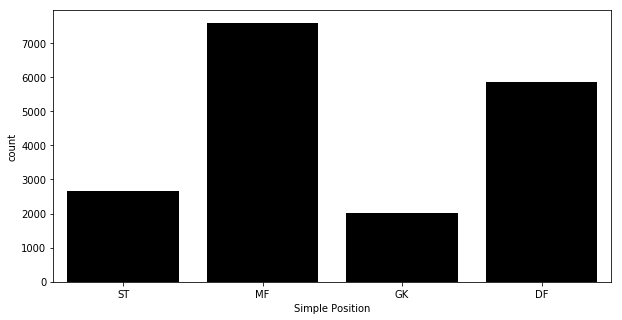

In [190]:
# Dataset é desbalanceado: Possui muito mais atletas defensores.
plt.figure(figsize=(10,5))
sns.countplot(x="Simple Position", data=df, color='k')
plt.show()

In [191]:
drop_cols = df.columns[22:48]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Jersey Number','Joined','Special',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club', 'Weak Foot',
               'Preferred Foot', 'Nationality', 'LS', 'Release Clause', 'Work Rate', 'International Reputation',
                'Skill Moves'], axis = 1)
df = df.dropna()

feature_cols = list(df.columns)

feature_cols.pop(feature_cols.index("Simple Position"))

'Simple Position'

In [192]:
feature_cols

['Age',
 'Overall',
 'Potential',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [193]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(df['Simple Position'])
X = df.drop(["Simple Position"], axis=1)
X = pd.get_dummies(X)

X = X.values

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
skf = StratifiedKFold(n_splits=20, shuffle=True)

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)

In [196]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [197]:
depth = []
for i in range(3,20): #tree depth
    clf = DecisionTreeClassifier(criterion="gini", max_depth=i)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.762485256988674), (4, 0.787904175649811), (5, 0.8314404095067726), (6, 0.8447339877094618), (7, 0.8488656504429366), (8, 0.854376573750739), (9, 0.8564435440208351), (10, 0.8572704172179366), (11, 0.8551348610461151), (12, 0.8503811101238087), (13, 0.8485219619811437), (14, 0.8456280472767691), (15, 0.8383267513397283), (16, 0.839015053626724), (17, 0.8352955702957774), (18, 0.8348826314827893), (19, 0.8320585605544704)]


In [216]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [217]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7526170798898072


In [218]:
class_names = []
for i in range(len(list(set(y_test)))):
    pos = le.inverse_transform([i])[0]
    class_names.append(pos)
class_names

['DF', 'GK', 'MF', 'ST']

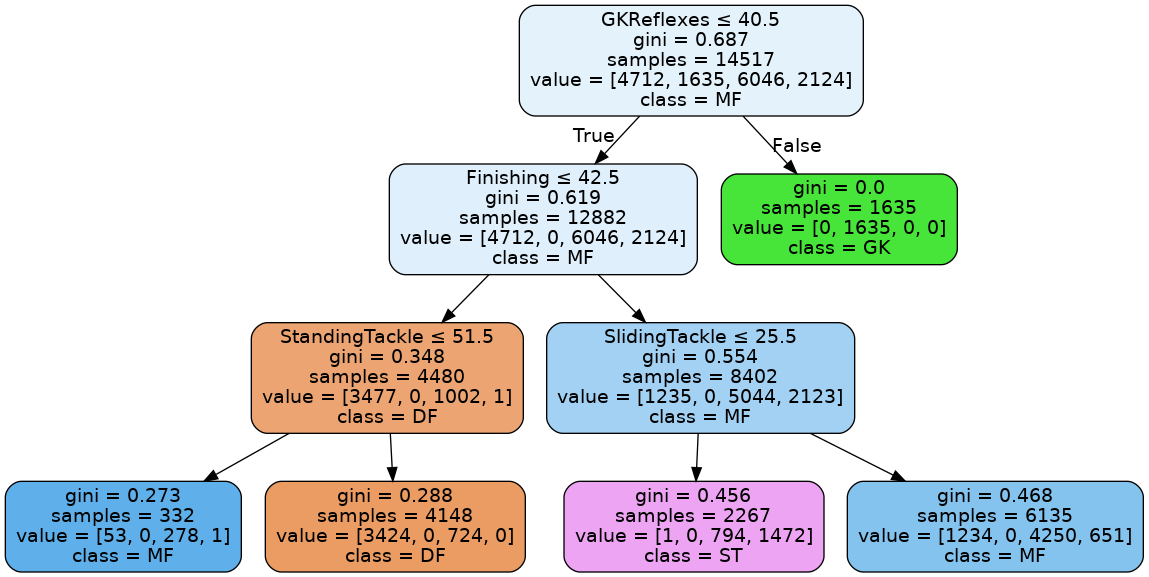

In [223]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [214]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

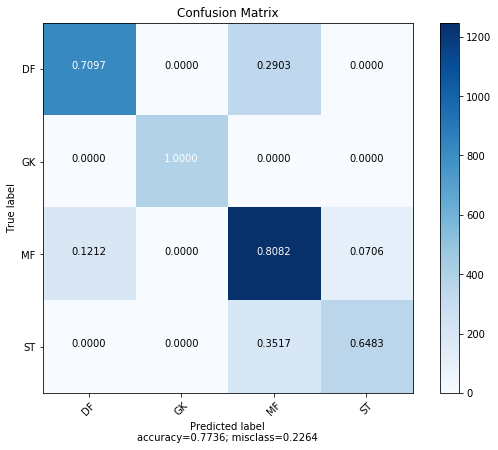

In [215]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm           = array,
                      normalize    = True,
                      target_names = class_names,
                      title        = "Confusion Matrix")